In [0]:
import matplotlib.pylab as plt
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization, Input
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from pathlib import Path
from keras.optimizers import Adam,RMSprop,SGD
import pandas as pd

In [0]:
df = pd.read_csv("monkey_labels.txt")
#print(df)

height=150
width=150
channels=3
batch_size=128
seed=647


In [4]:
!unzip 'training.zip'

Archive:  training.zip
   creating: training/
   creating: training/n0/
  inflating: training/n0/n0018.jpg   
  inflating: training/n0/n0019.jpg   
  inflating: training/n0/n0020.jpg   
  inflating: training/n0/n0021.jpg   
  inflating: training/n0/n0022.jpg   
  inflating: training/n0/n0023.jpg   
  inflating: training/n0/n0024.jpg   
  inflating: training/n0/n0025.jpg   
  inflating: training/n0/n0026.jpg   
  inflating: training/n0/n0027.jpg   
  inflating: training/n0/n0028.jpg   
  inflating: training/n0/n0029.jpg   
  inflating: training/n0/n0030.jpg   
 extracting: training/n0/n0031.jpg   
  inflating: training/n0/n0032.jpg   
  inflating: training/n0/n0033.jpg   
  inflating: training/n0/n0034.jpg   
 extracting: training/n0/n0035.jpg   
  inflating: training/n0/n0036.jpg   
  inflating: training/n0/n0037.jpg   
  inflating: training/n0/n0038.jpg   
  inflating: training/n0/n0039.jpg   
  inflating: training/n0/n0040.jpg   
  inflating: training/n0/n0041.jpg   
  inflating: tra

In [5]:
!unzip 'validation.zip'

Archive:  validation.zip
   creating: validation/
   creating: validation/n0/
  inflating: validation/n0/n000.jpg  
  inflating: validation/n0/n001.jpg  
  inflating: validation/n0/n0010.jpg  
  inflating: validation/n0/n0011.jpg  
  inflating: validation/n0/n0012.jpg  
  inflating: validation/n0/n0013.jpg  
  inflating: validation/n0/n0014.jpg  
  inflating: validation/n0/n0015.jpg  
  inflating: validation/n0/n0016.jpg  
  inflating: validation/n0/n0017.jpg  
  inflating: validation/n0/n002.jpg  
  inflating: validation/n0/n003.jpg  
  inflating: validation/n0/n004.jpg  
  inflating: validation/n0/n005.jpg  
  inflating: validation/n0/n006.jpg  
  inflating: validation/n0/n007.jpg  
  inflating: validation/n0/n008.jpg  
  inflating: validation/n0/n009.jpg  
 extracting: validation/n0/n010.jpg  
  inflating: validation/n0/n011.jpg  
  inflating: validation/n0/n012.jpg  
  inflating: validation/n0/n013.jpg  
  inflating: validation/n0/n014.jpg  
  inflating: validation/n0/n015.jpg  
  

In [6]:
train_dir = Path('training')
test_dir = Path('validation')

# Training generator
train_datagen = ImageDataGenerator(rotation_range = 30
                                   ,rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    class_mode='categorical')

Found 326 images belonging to 3 classes.


In [7]:
# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(height,width),
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  class_mode='categorical')


Found 81 images belonging to 3 classes.


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,150,3)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(Adam(lr=0.001),loss="categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model_fit = model.fit_generator(train_generator,
        steps_per_epoch= 1024/batch_size,
          epochs=20,
          verbose=1,
          validation_data=test_generator,
                    validation_steps= 4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
8/8 [==============================] - 41s 5s/step - loss: 9.3266 - acc: 0.3371 - val_loss: 10.5464 - val_acc: 0.3457
Epoch 2/20
8/8 [==============================] - 24s 3s/step - loss: 10.6890 - acc: 0.3368 - val_loss: 10.5464 - val_acc: 0.3457
Epoch 3/20
8/8 [==============================] - 24s 3s/step - loss: 10.5962 - acc: 0.3426 - val_loss: 10.5464 - val_acc: 0.3457
Epoch 4/20
8/8 [==============================] - 25s 3s/step - loss: 10.5549 - acc: 0.3452 - val_loss: 10.5464 - val_acc: 0.3457
Epoch 5/20
8/8 [==============================] - 23s 3s/step - loss: 10.7418 - acc: 0.3336 - val_loss: 10.5464 - val_acc: 0.3457
Epoch 6/20
8/8 [==============================] - 24s 3s/step - loss: 10.6362 - acc: 0.3401 - val_loss: 10.5464 - val_acc: 0.3457
Epoch 7/20
8/8 [==============================] - 24s 3s/step - loss: 10.6477 - acc: 0.3394 - val_loss: 10.5464 - val_acc: 0.3457
Epoch 8/20
8/8 [===========================

In [11]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 700928)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               358875648 
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 359,008,643
Trainable params: 359,008,643
Non-trainable params: 0
______________________________________________________________

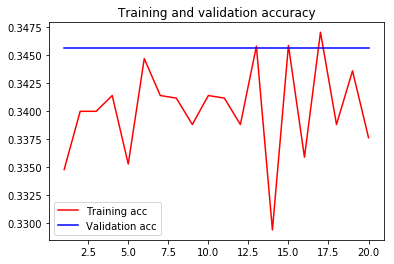

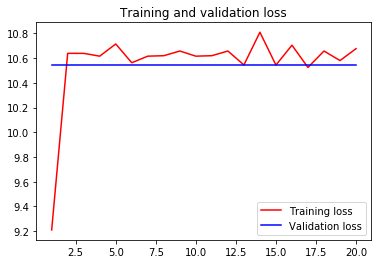

In [12]:
acc = model_fit.history['acc']
val_acc = model_fit.history['val_acc']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()